In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from src.plots import *
from src.prompts import *
from src.pref_models import *

In [ ]:
suffix = 'es'
results = pd.read_csv(f'experiments/rankings_{suffix}.csv')
results.head()

,Color,BT_Score,iteration
0,Amarillo,2.000727e+00,0
1,Azul,1.276982e+00,0
2,Verde,3.343121e-08,0
3,Rojo,-1.276982e+00,0
4,Morado,-2.000727e+00,0


In [2]:
results = results.pivot(index='iteration', columns='Color', values='BT_Score').reset_index()
results.columns.name = None
results.head()

,iteration,Amarillo,Azul,Morado,Rojo,Verde
0,0,2.000727,1.276982,-2.000727,-1.276982,3.343121e-08
1,1,0.277001,0.277001,-1.560567,0.503283,5.032827e-01
2,2,0.622911,0.322369,-1.296309,0.175516,1.755133e-01
3,3,0.209768,0.420658,-0.636051,0.106070,-1.004456e-01
4,4,0.164824,0.330321,-0.497859,0.082972,-8.025759e-02


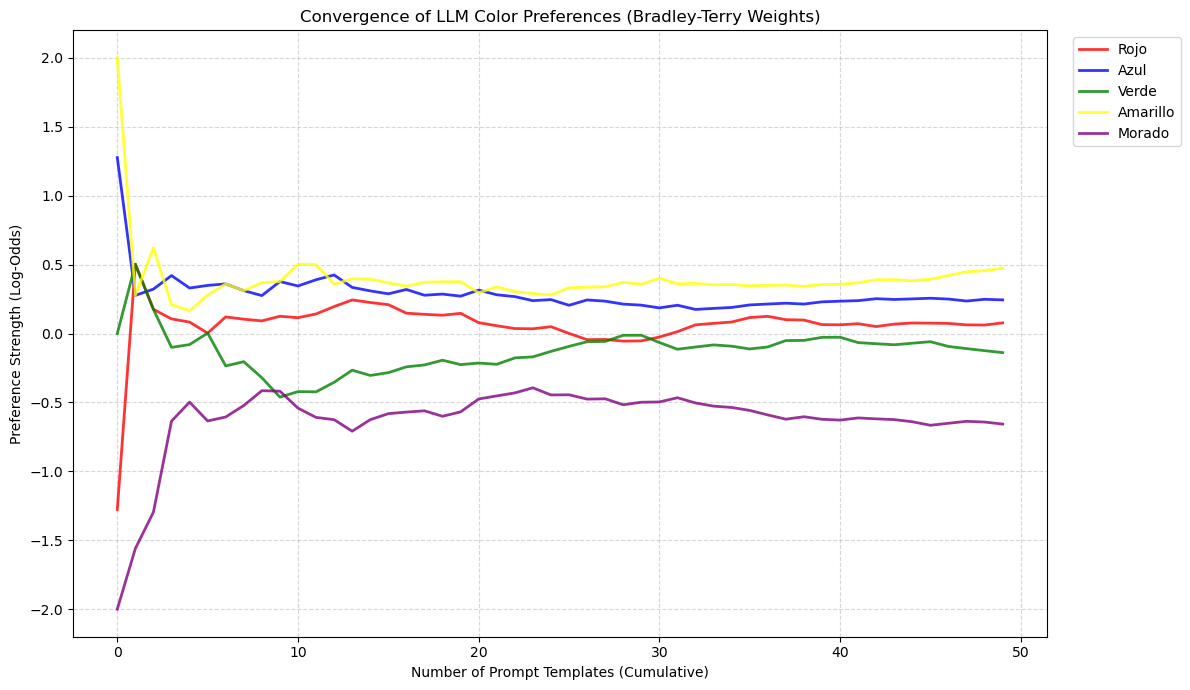

In [ ]:
plot_convergence(results, list(color_es_dict.keys()), color_map=color_es_dict)

/home/lotanamit5/WhatDoLLMsWant/src/plots.py:29: UserWarning: Glyph 32418 (\N{CJK UNIFIED IDEOGRAPH-7EA2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/lotanamit5/WhatDoLLMsWant/src/plots.py:29: UserWarning: Glyph 33394 (\N{CJK UNIFIED IDEOGRAPH-8272}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/lotanamit5/WhatDoLLMsWant/src/plots.py:29: UserWarning: Glyph 34013 (\N{CJK UNIFIED IDEOGRAPH-84DD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/lotanamit5/WhatDoLLMsWant/src/plots.py:29: UserWarning: Glyph 32511 (\N{CJK UNIFIED IDEOGRAPH-7EFF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/lotanamit5/WhatDoLLMsWant/src/plots.py:29: UserWarning: Glyph 40644 (\N{CJK UNIFIED IDEOGRAPH-9EC4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/lotanamit5/WhatDoLLMsWant/src/plots.py:29: UserWarning: Glyph 32043 (\N{CJK UNIFIED IDEOGRAPH-7D2B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/lotanamit5/miniconda3/

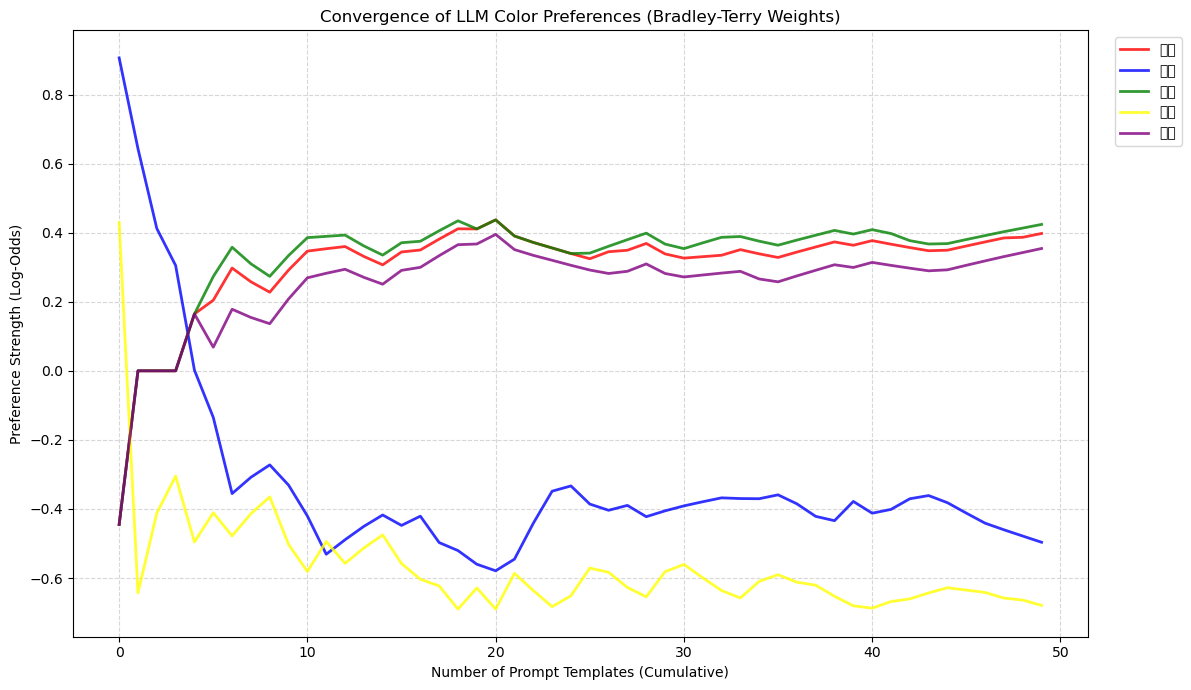

In [ ]:
suffix = 'zh'
results_zh = pd.read_csv(f'experiments/rankings_{suffix}.csv')
results_zh.head()
results_zh = results_zh.pivot(index='iteration', columns='Color', values='BT_Score').reset_index()
results_zh.columns.name = None
plot_convergence(results_zh, list(color_dict_zh.keys()), color_map=color_dict_zh)

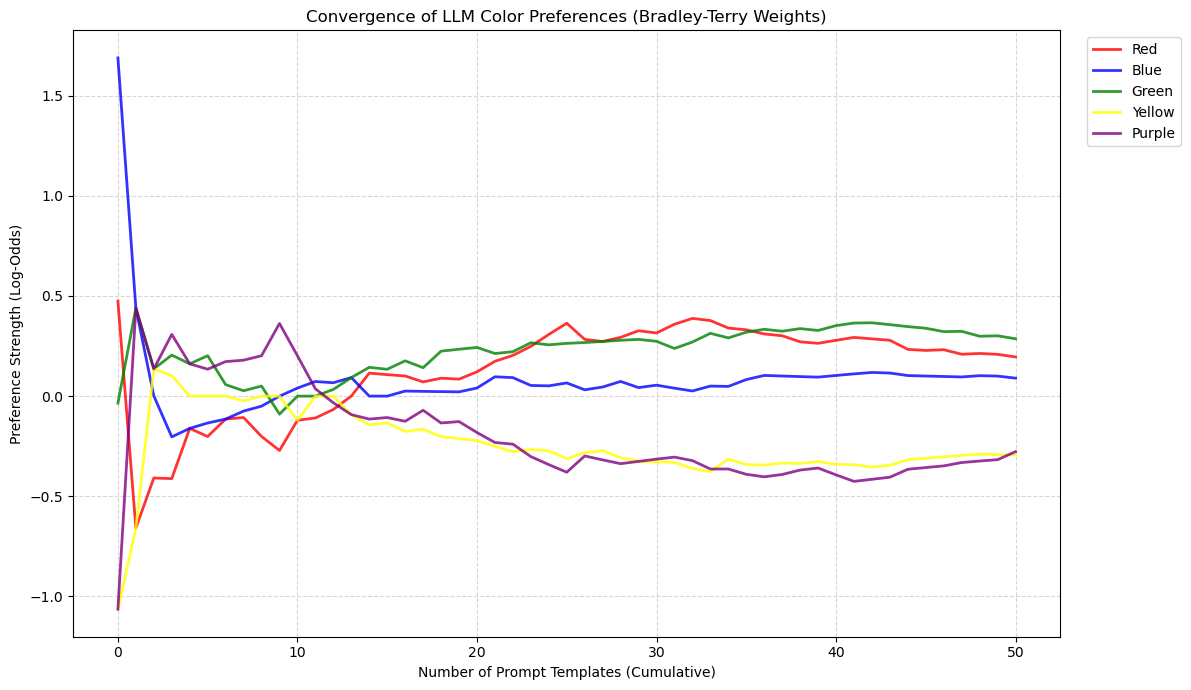

In [ ]:
suffix = 'en'
results_en = pd.read_csv(f'experiments/rankings_{suffix}.csv')
results_en = results_en.pivot(index='iteration', columns='Color', values='BT_Score').reset_index()
results_en.columns.name = None
plot_convergence(results_en, list(color_en_dict.keys()), color_map=color_en_dict)

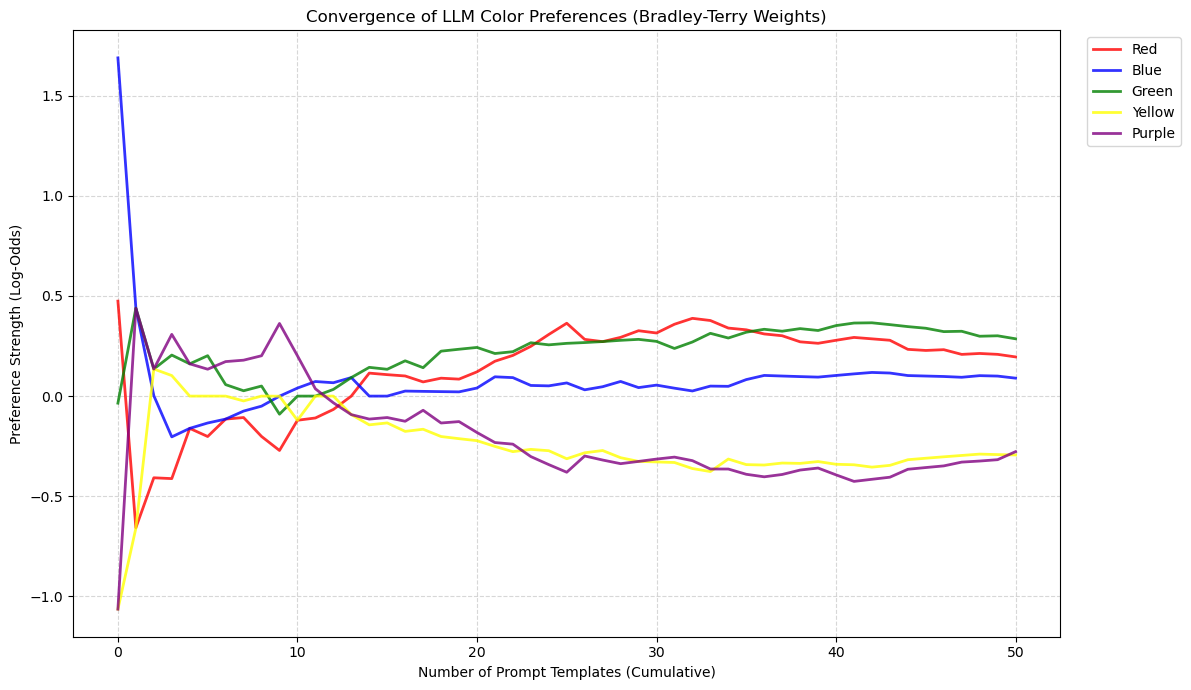

In [ ]:
results = pd.read_csv(f'experiments/results_en.csv')
colors = list(color_en_dict.keys())
templates = results['template'].unique().tolist()
data = pd.DataFrame()
rankings = []
for i, template in enumerate(templates):
    template_data = results[results['template'] == template]
    data = pd.concat([data, template_data], ignore_index=True)
    ranking, _ = fit_bradley_terry(data, colors)
    rankings.append(ranking.assign(iteration=i))
rankings_df = pd.concat(rankings)
rankings_df = rankings_df.pivot(index='iteration', columns='Color', values='BT_Score').reset_index()
rankings_df.columns.name = None

plot_convergence(rankings_df, colors, color_map=color_en_dict)


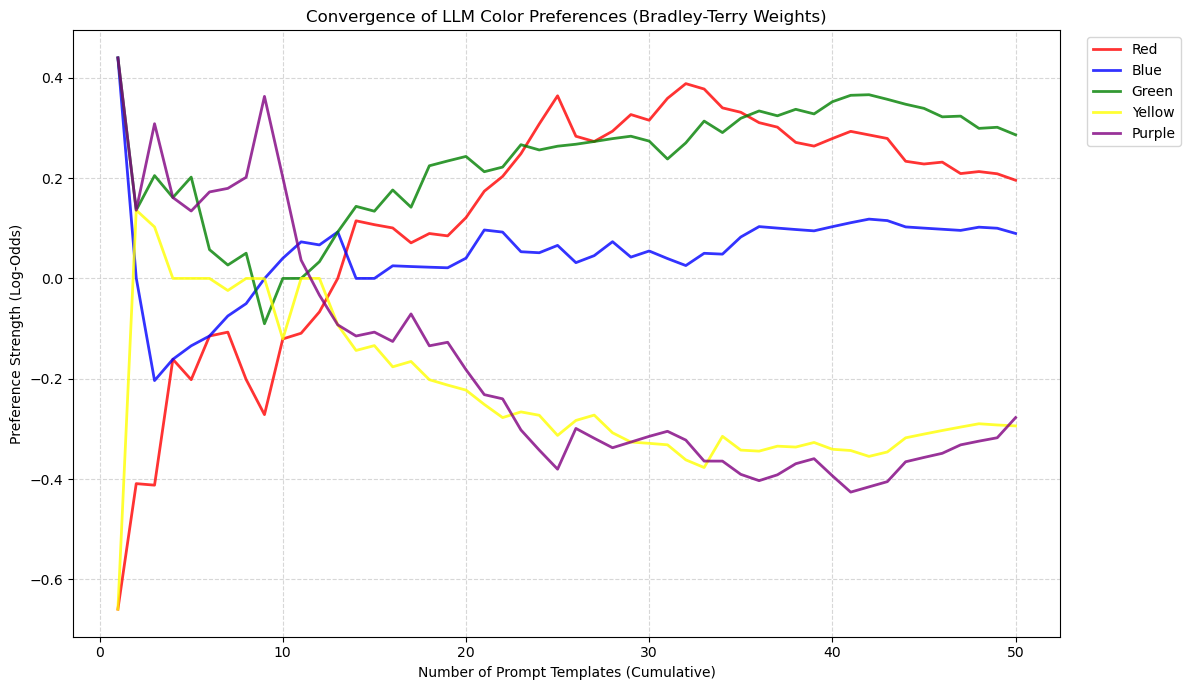

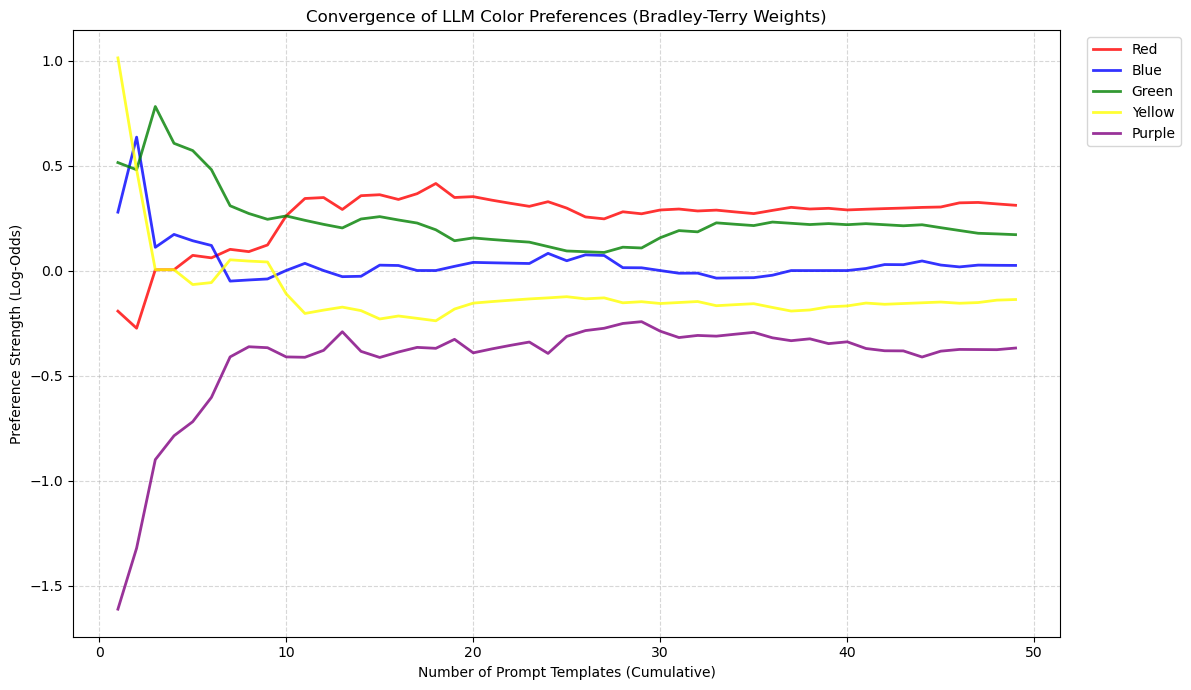

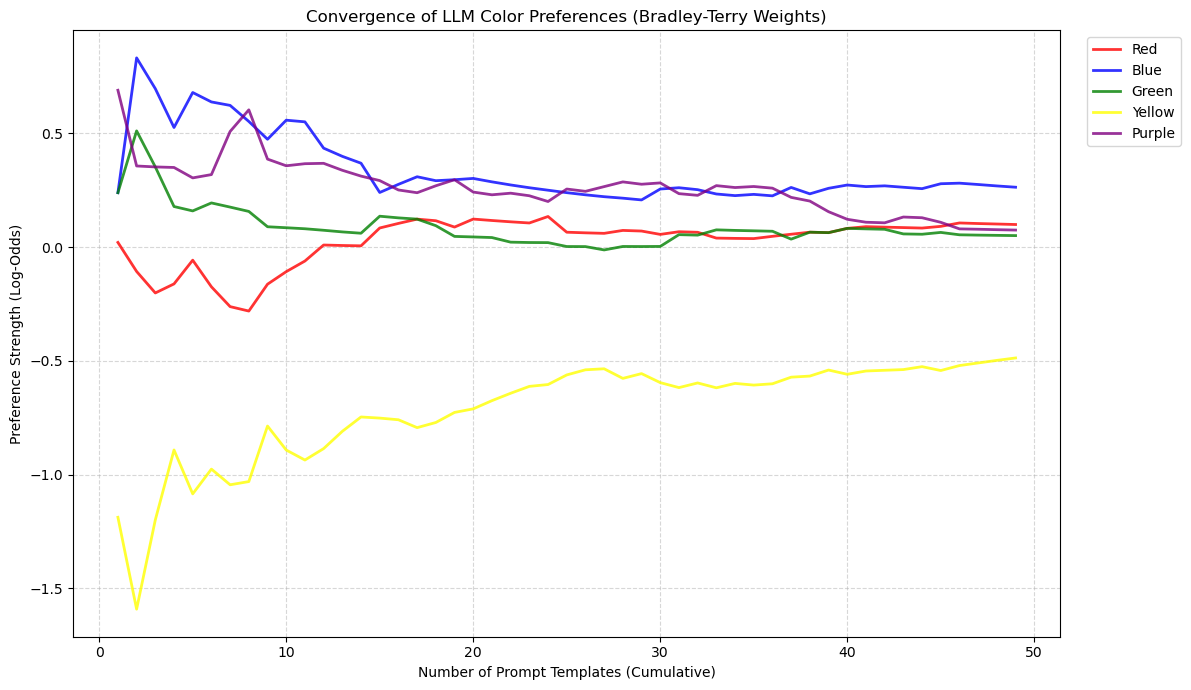

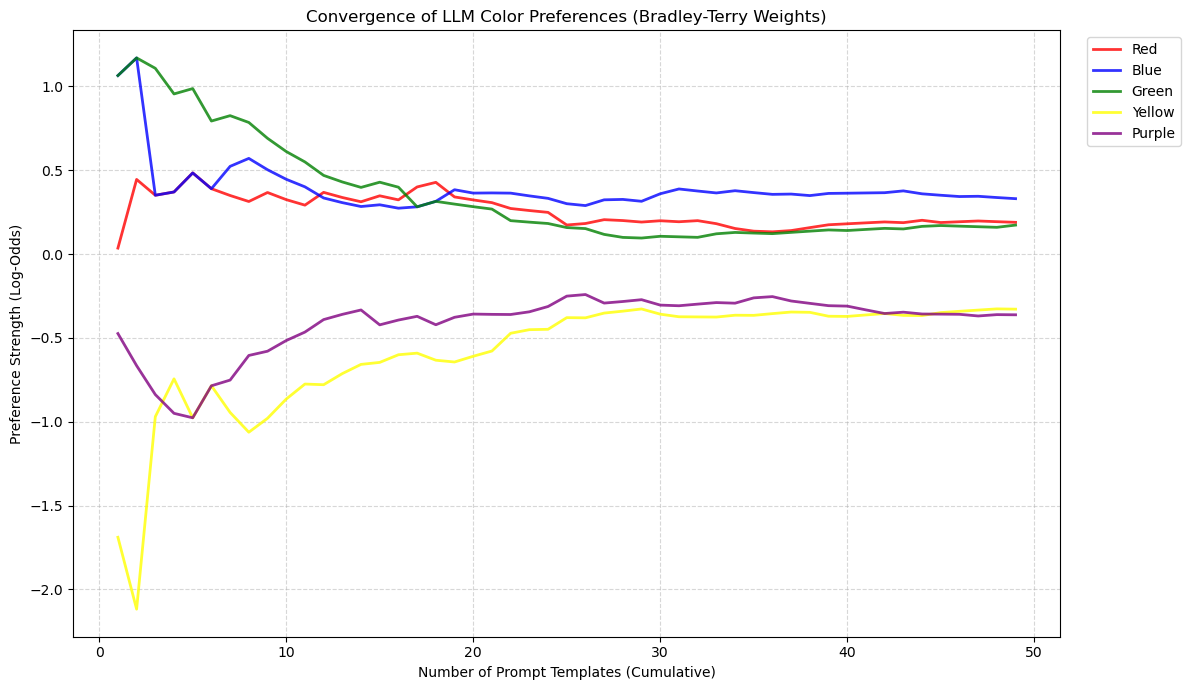

In [ ]:
colors = list(color_en_dict.keys())
for model in ['qwen05', 'qwen7', 'qwen32','qwen72']:
    rankings = pd.read_csv(f'experiments/colors_en_{model}/rankings.csv')
    rankings = rankings.pivot(index='iteration', columns='Color', values='BT_Score').reset_index()
    rankings.columns.name = None
    plot_convergence(rankings[1:], colors, color_map=color_en_dict)

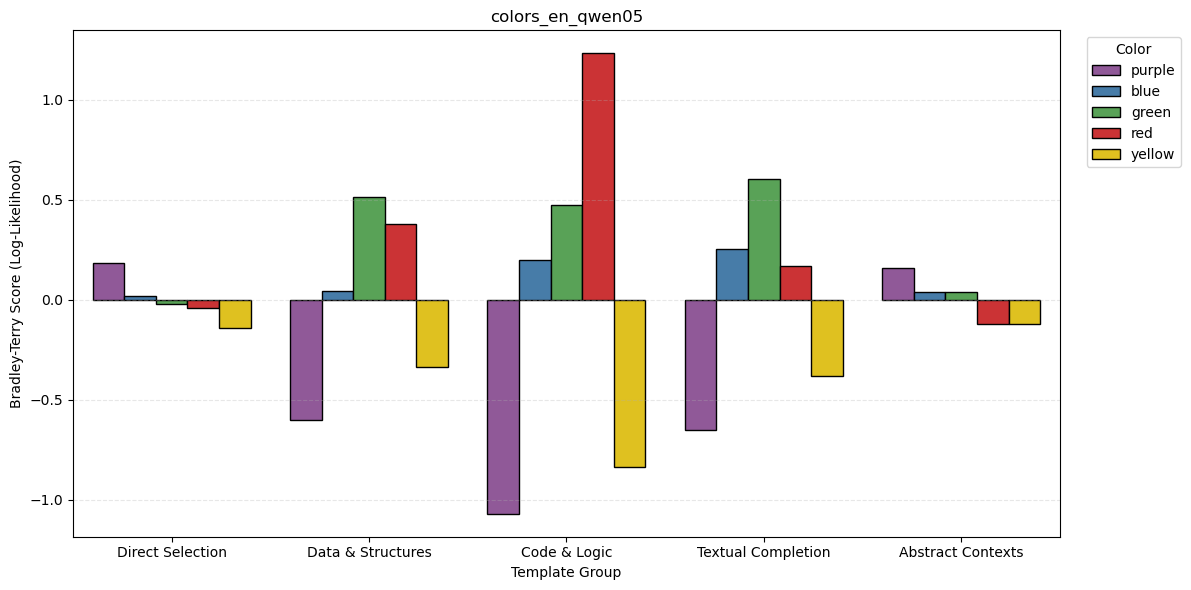

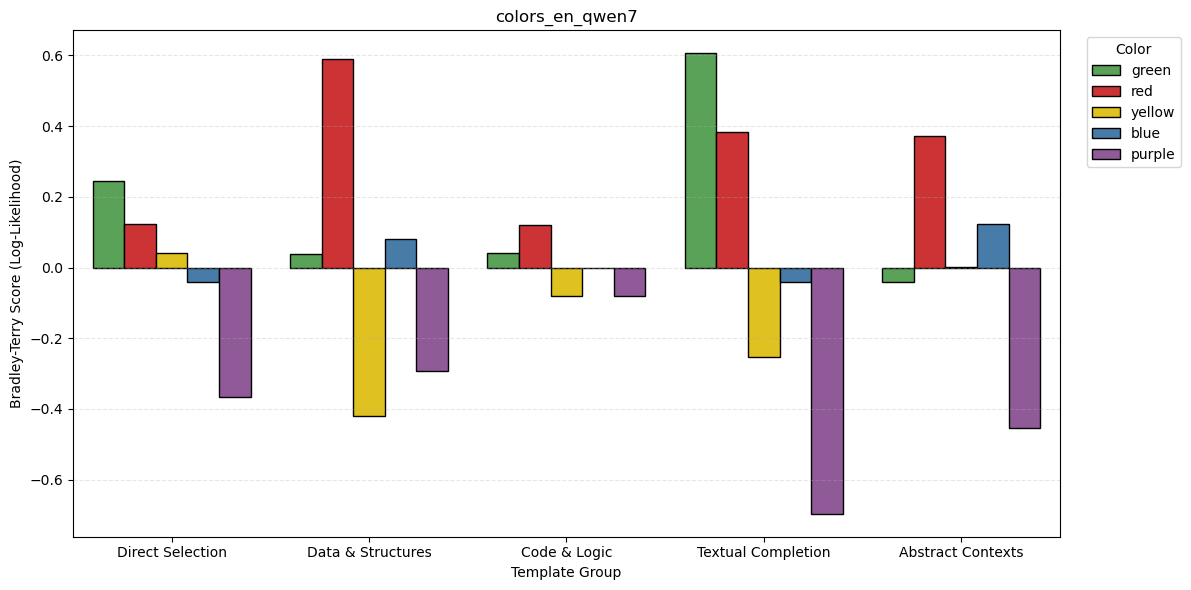

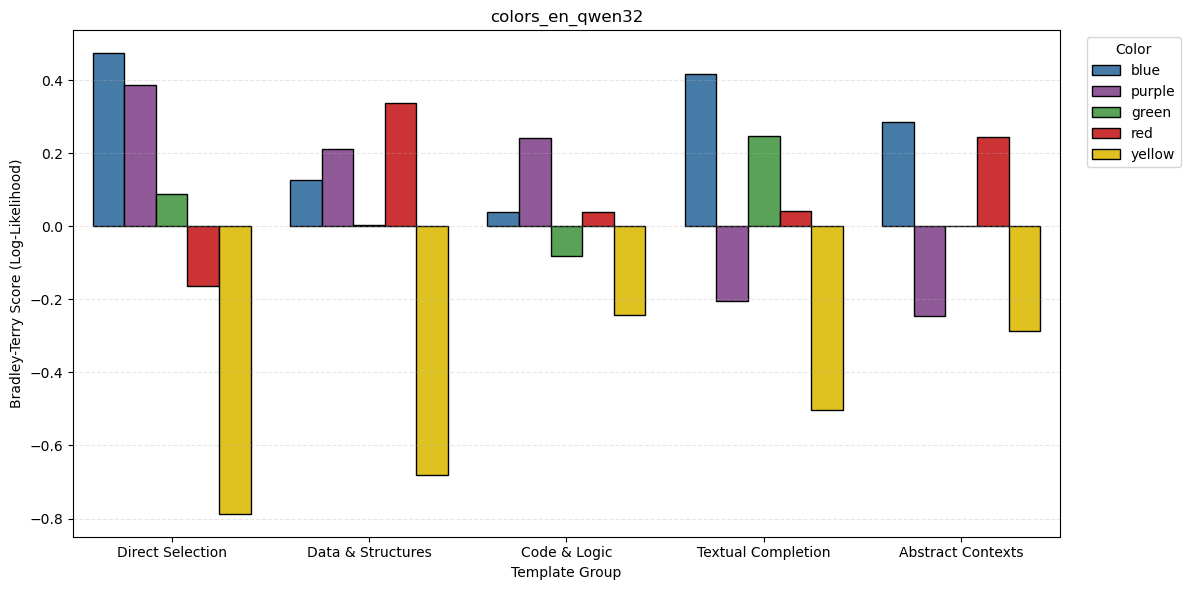

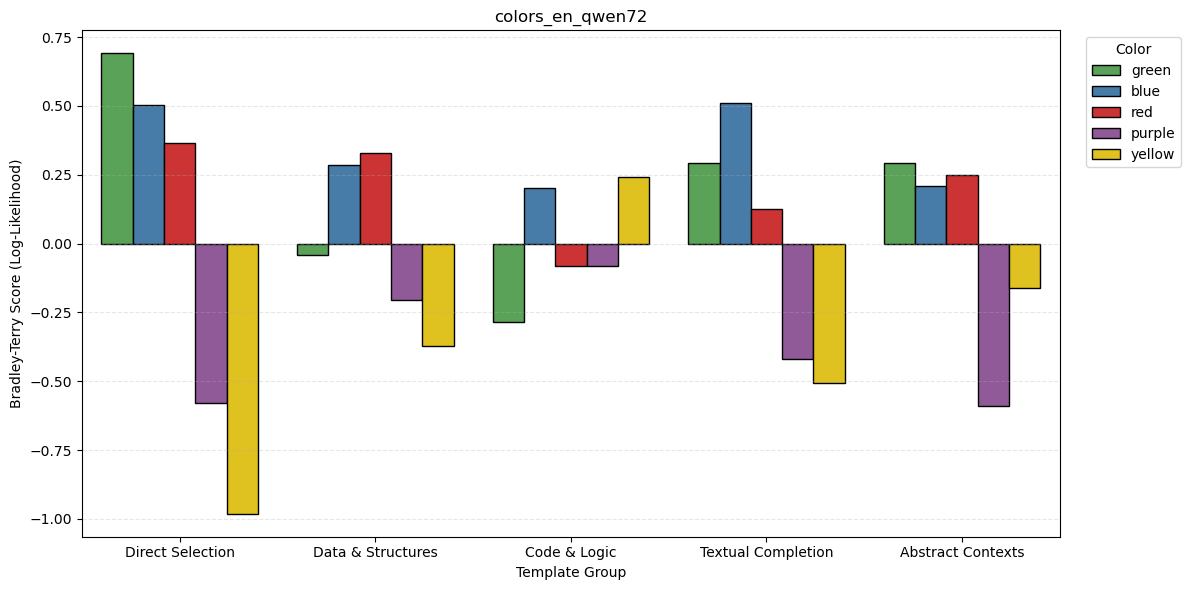

In [ ]:
def analyze_template_groups(model_path):
    # Load answers
    df_answers = pd.read_csv(model_path)

    # Define groupings based on prompts.py structure (5 groups, 10 templates each)
    group_labels = [
        'Direct Selection',
        'Data & Structures', 
        'Code & Logic',
        'Textual Completion',
        'Abstract Contexts'
    ]

    # Split templates_en into chunks of 10
    # We assume templates_en corresponds exactly to these 5 groups in order
    group_templates = {}
    chunk_size = 10
    for i, label in enumerate(group_labels):
        start = i * chunk_size
        end = start + chunk_size
        group_templates[label] = templates_en[start:end]

    # Calculate BT scores for each group
    group_scores = []
    colors = list(color_en_dict.keys())

    for label, templates in group_templates.items():
        # Filter answers for this group's templates
        subset = df_answers[df_answers['template'].isin(templates)]
        
        if not subset.empty:
            ranking, _ = fit_bradley_terry(subset, colors)
            ranking['Group'] = label
            group_scores.append(ranking)

    # Combine and Plot
    if group_scores:
        df_scores = pd.concat(group_scores)
        
        plt.figure(figsize=(12, 6))
        
        # Custom palette matching the colors
        color_palette = {
            'red': '#E41A1C', 
            'blue': '#377EB8', 
            'green': '#4DAF4A',
            'yellow': '#FFD700', 
            'purple': '#984EA3'
        }
        
        sns.barplot(
            data=df_scores,
            x='Group',
            y='BT_Score',
            hue='Color',
            palette=color_palette,
            edgecolor='black'
        )
        
        # Extract model name from path for title (simple heuristic)
        model_name = model_path.split('/')[-2] if '/' in model_path else 'Model'
        
        plt.title(model_name)
        plt.ylabel('Bradley-Terry Score (Log-Likelihood)')
        plt.xlabel('Template Group')
        plt.legend(title='Color', bbox_to_anchor=(1.02, 1), loc='upper left')
        plt.grid(True, axis='y', linestyle='--', alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data found matching the templates in {model_path}.")

# Example usage with Qwen 7B
for model_name in ['qwen05', 'qwen7', 'qwen32', 'qwen72']:
    model_path = f'experiments/colors_en_{model_name}/answers.csv'
    analyze_template_groups(model_path)

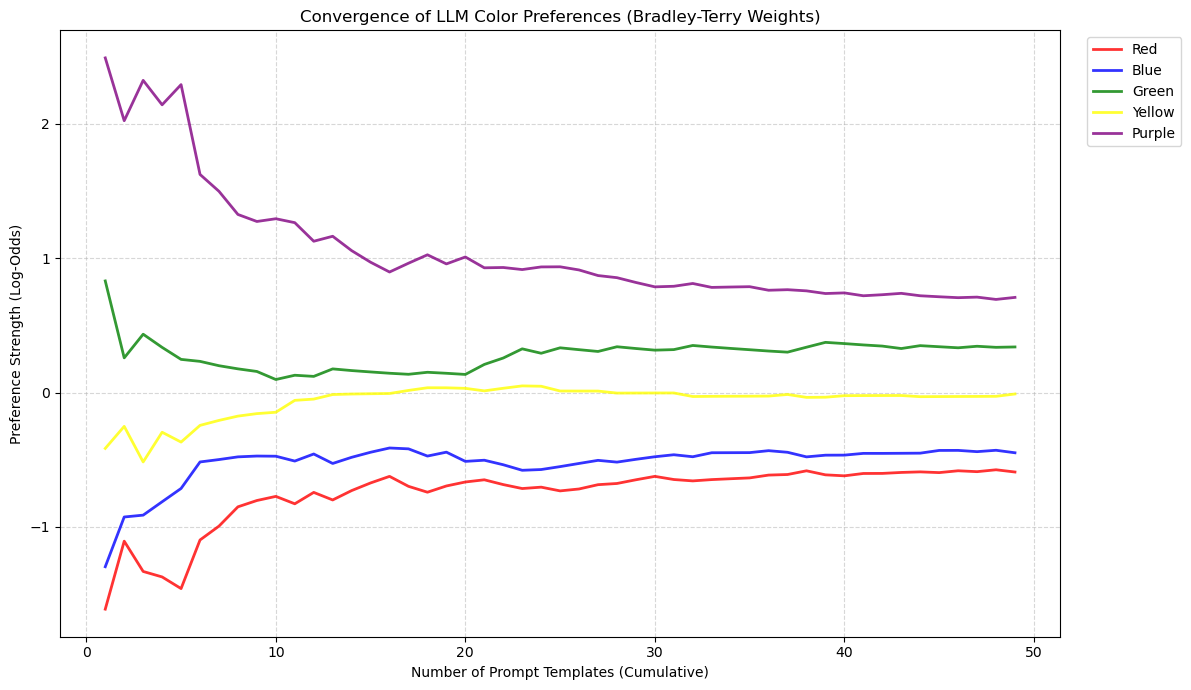

In [ ]:
model = "qwen05I"
rankings = pd.read_csv(f'experiments/colors_en_{model}/rankings.csv')
rankings = rankings.pivot(index='iteration', columns='Color', values='BT_Score').reset_index()
rankings.columns.name = None
plot_convergence(rankings[1:], colors, color_map=color_en_dict)

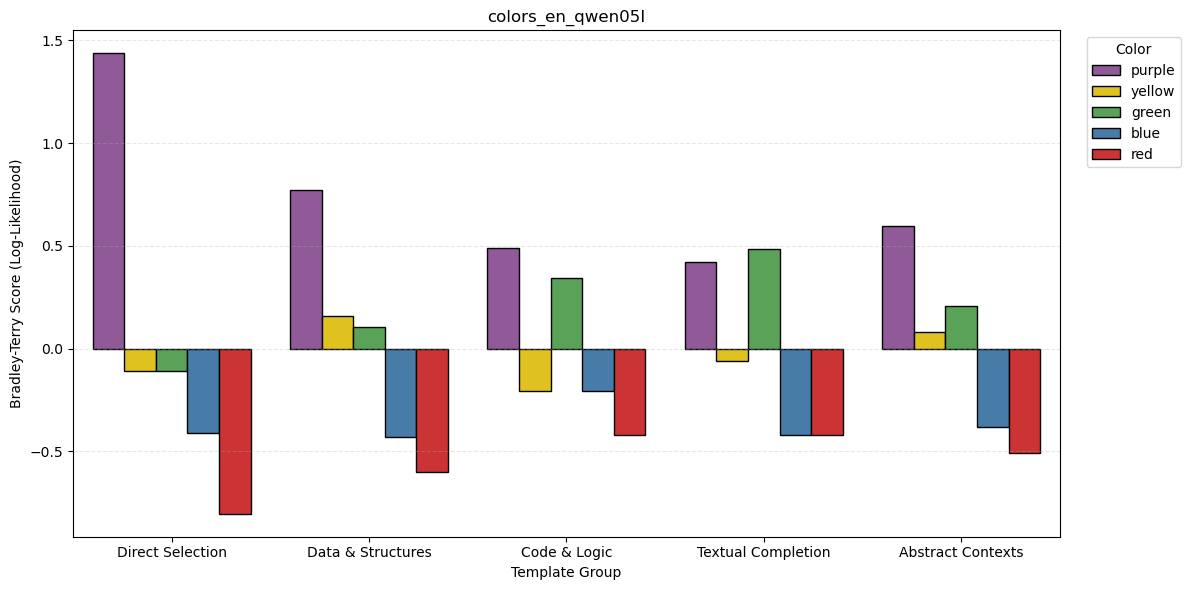

In [11]:
model_path = f'experiments/colors_en_{model}/answers.csv'
analyze_template_groups(model_path)

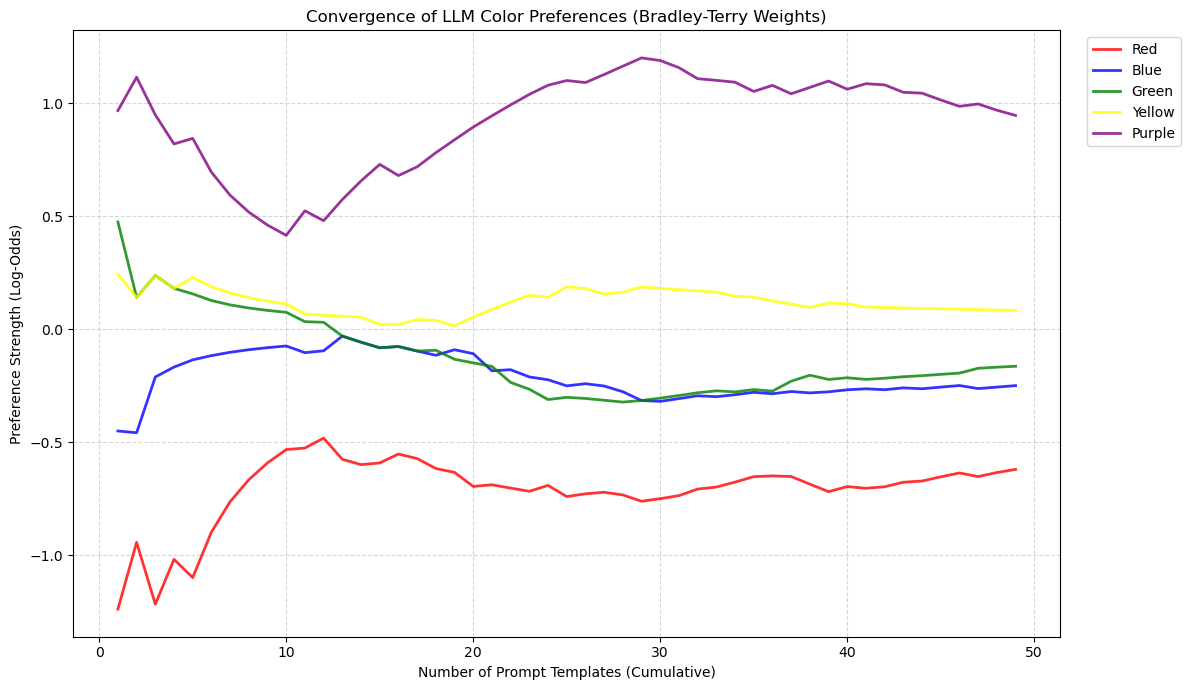

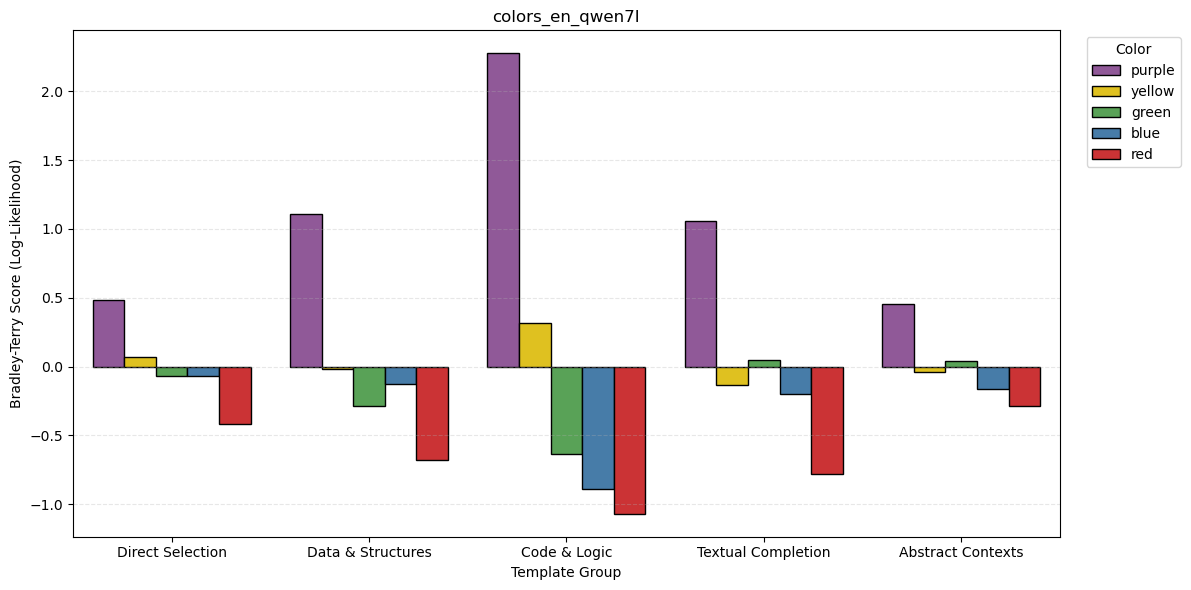

In [ ]:
model = "qwen7I"
rankings = pd.read_csv(f'experiments/colors_en_{model}/rankings.csv')
rankings = rankings.pivot(index='iteration', columns='Color', values='BT_Score').reset_index()
rankings.columns.name = None
plot_convergence(rankings[1:], colors, color_map=color_en_dict)
model_path = f'experiments/colors_en_{model}/answers.csv'
analyze_template_groups(model_path)

In [ ]:
colors = list(color_en_dict.keys())
for exp_names in ['qwen05', 'qwen7', 'qwen32','qwen72']:
    rankings = pd.read_csv(f'experiments/{exp_name}/rankings.csv')
    rankings = rankings.pivot(index='iteration', columns='Color', values='BT_Score').reset_index()
    rankings.columns.name = None
    plot_convergence(rankings[1:], colors, color_map=color_en_dict)